## Open Vaccine Stanford GRU Model - RNA Covid 19

**mRNA vaccines** have taken the lead as the fastest vaccine candidates for COVID-19, but currently, they face key potential limitations. One of the biggest challenges right now is **how to design super stable messenger RNA molecules (mRNA)**. 

Conventional vaccines (like your seasonal flu shots) are packaged in disposable syringes and shipped under refrigeration around the world, but that is not currently possible for mRNA vaccines.

**Ribonucleic acid (RNA)** is a linear molecule composed of four types of smaller molecules called ribonucleotide bases: adenine (A), cytosine (C), guanine (G), and uracil (U).

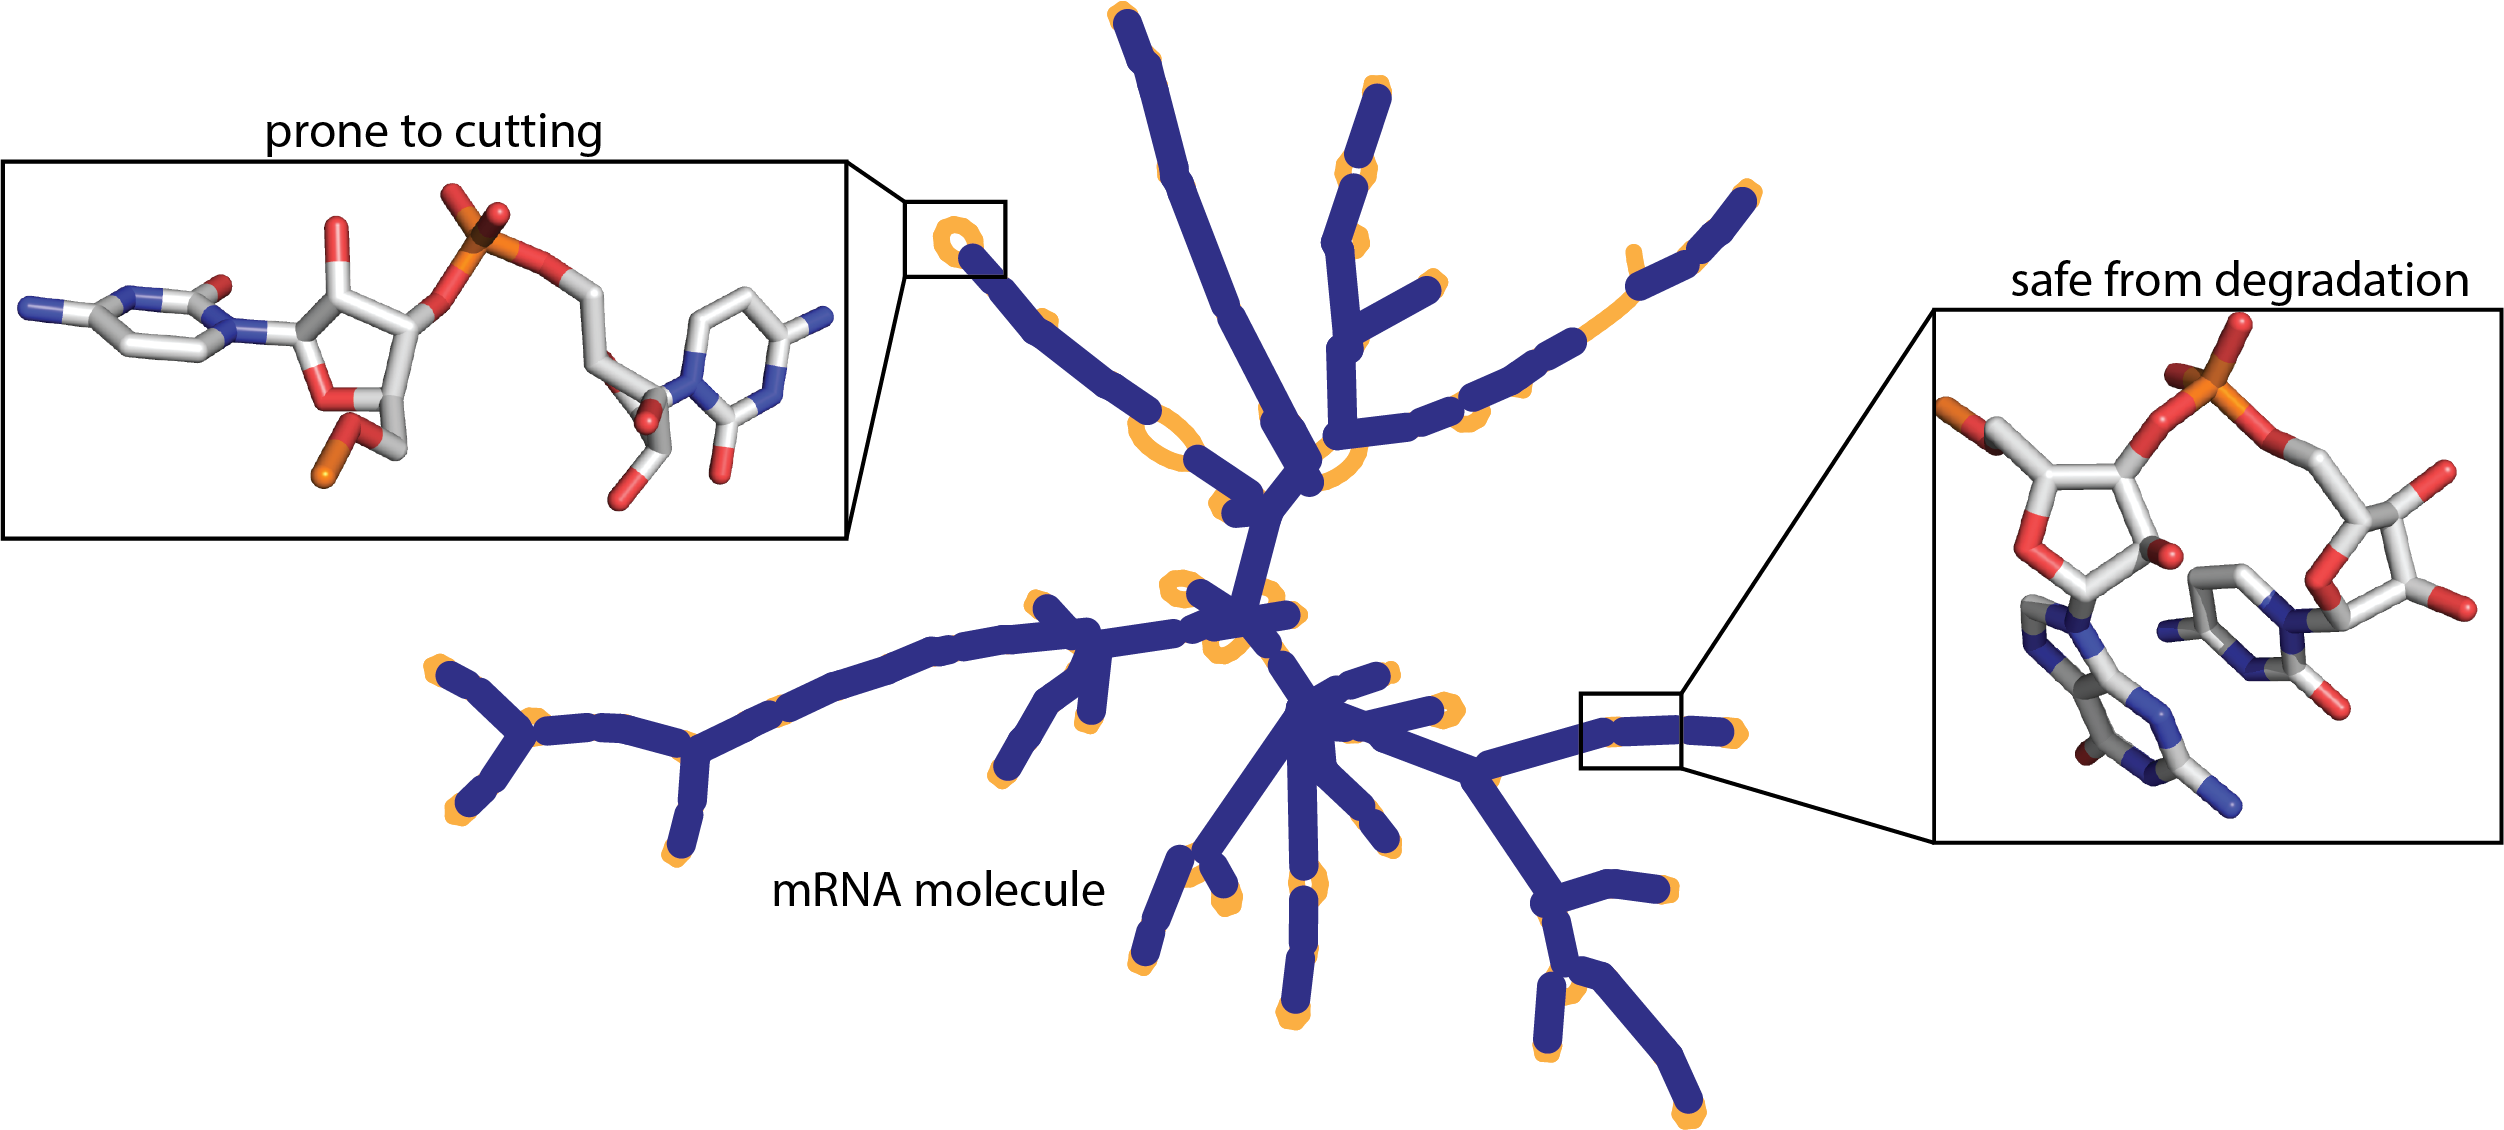
Each ribonucleotide base consists of a ribose sugar, a phosphate group, and a nitrogenous base .


Researchers have observed that RNA molecules have the tendency to **spontaneously degrade**. This is a serious limitation--a single cut can render the mRNA vaccine useless. Currently, little is known on the details of where in the backbone of a given RNA is most prone to being affected. Without this knowledge, current mRNA vaccines against COVID-19 must be prepared and shipped under intense refrigeration, and are unlikely to reach more than a tiny fraction of human beings on the planet unless they can be stabilized.

**Task:** To build a model which will predict likely degradation rates at each base of an RNA molecule which can be useful To develop models and design rules for RNA degradation.  




https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

**Sequence Prediction**

Sequence prediction is a problem that involves using historical sequence information to predict the next value or values in the sequence. The sequence may be symbols like letters in a sentence or real values like those in a time series of prices

**GRU**

The GRU, known as the Gated Recurrent Unit is an RNN architecture, which is similar to LSTM units. The GRU comprises of the reset gate and the update gate instead of the input, output and forget gate of the LSTM.

**Bidirectional RNNs**

In a bidirectional RNN, we consider 2 separate sequences. One from right to left and the other in the reverse order.

**Bidirectional Gated Recurrent Unit (GRU)**

Bidirectional GRU's are a type of bidirectional recurrent neural networks with only the reset and update gates. It allows for the use of information from both previous time steps and later time steps to make predictions about the current state.




In [2]:
pip install plotly

     |████████████████████████████████| 13.2 MB 1.1 MB/s eta 0:00:01
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=8ae12141897cf12cc0183cba55d0f7d499353080e9eb7669e52e37d039be0dfe
  Stored in directory: /Users/tarindujayatilaka/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [14]:
import json

import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow.keras.layers as L
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
#Set Seeds to ensure reproducibility
tf.random.set_seed(2020)
np.random.seed(2020)

## Loading the Data



In [5]:
data = pd.read_json("data.json",lines=True)

In [7]:
data

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,id_ff84602f7,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,........((..((......))...)).........(((..........,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,4.036,1,

## Data Description

**sequence** - (1x107 string) Describes the RNA sequence, a combination of A, G, U, and C for each sample. Should be 107 characters long, and the first 68 bases should correspond to the 68 positions specified in seq_scored (note: indexed starting at 0).

**structure** - (1x107 string) An array of (, ), and . characters that describe whether a base is estimated to be paired or unpaired. Paired bases are denoted by opening and closing parentheses e.g. (....) means that base 0 is paired to base 5, and bases 1-4 are unpaired.

**predicted_loop_type** - (1x107 string) Describes the structural context (also referred to as 'loop type')of each character in sequence. Loop types assigned by bpRNA from Vienna RNAfold 2 structure. From the bpRNA_documentation: S: paired "Stem" M: Multiloop I: Internal loop B: Bulge H: Hairpin loop E: dangling End X: eXternal loop

**reactivity** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likely secondary structure of the RNA sample.

**deg_pH10** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high pH (pH 10).

**deg_Mg_pH10** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium in high pH (pH 10).

**deg_50C** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating without magnesium at high temperature (50 degrees Celsius).

**deg_Mg_50C** - (1x68 vector) An array of floating point numbers, should have the same length as seq_scored. These numbers are reactivity values for the first 68 bases as denoted in sequence, and used to determine the likelihood of degradation at the base/linkage after incubating with magnesium at high temperature (50 degrees Celsius).




## Visualizing Distribution of Structure Molecules, Sequences and Predicted Loop Type

In [9]:
from functools import reduce
all_stuctures = reduce(lambda x, y:x+y, data['structure'].apply(list).tolist())
all_sequences = reduce(lambda x, y:x+y, data['sequence'].apply(list).tolist())
all_predicted_loop_types = reduce(lambda x, y:x+y, data['predicted_loop_type'].apply(list).tolist())

In [10]:
len(all_stuctures)

256800

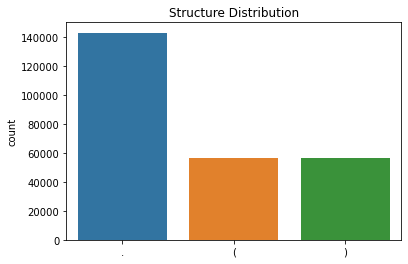

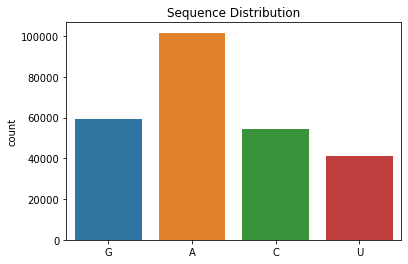

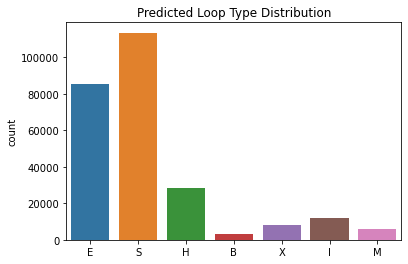

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Structure Distribution')
sns.countplot(x=all_stuctures)
plt.show()

plt.title('Sequence Distribution')
sns.countplot(x=all_sequences)
plt.show()

plt.title('Predicted Loop Type Distribution')
sns.countplot(x=all_predicted_loop_types)
plt.show()

### Plotting Average Reactivity at each Position 

In [29]:
plt.style.use('fivethirtyeight')

avg_reactivity = np.array(list(map(np.array,data.reactivity))).mean(axis=0)
avg_deg_50C = np.array(list(map(np.array,data.deg_50C))).mean(axis=0)
avg_deg_pH10 = np.array(list(map(np.array,data.deg_pH10))).mean(axis=0)
avg_deg_Mg_50C = np.array(list(map(np.array,data.deg_Mg_50C))).mean(axis=0)
avg_deg_Mg_pH10 = np.array(list(map(np.array,data.deg_Mg_pH10))).mean(axis=0)

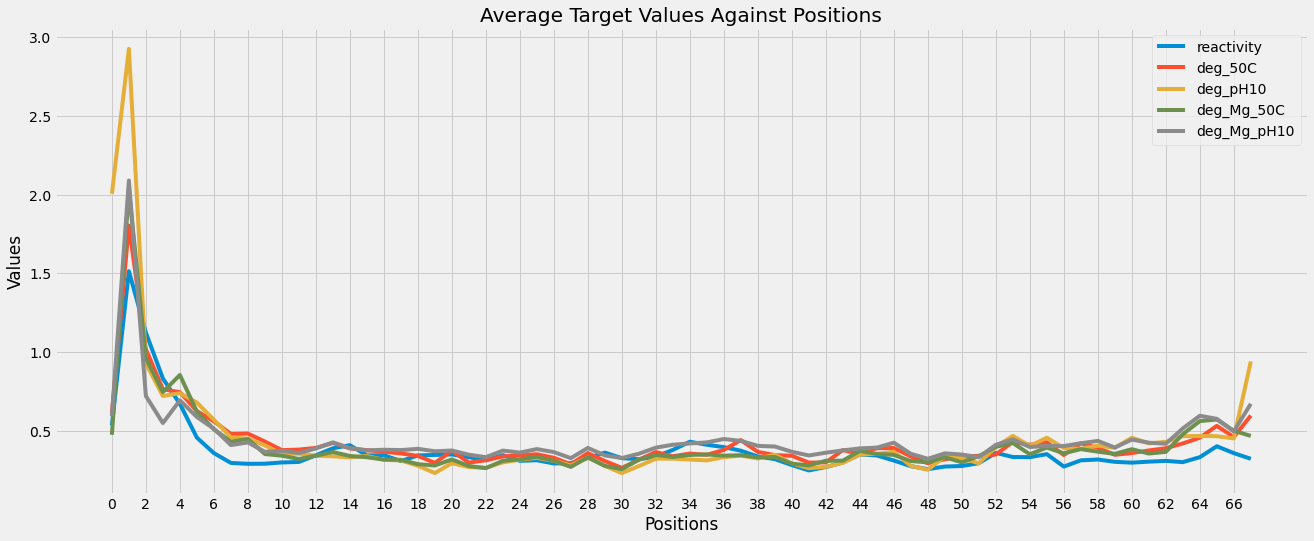

In [34]:
plt.figure(figsize=(20,8))
sns.lineplot(x=range(68), y=avg_reactivity,label="reactivity")
sns.lineplot(x=range(68), y=avg_deg_50C,label="deg_50C")
sns.lineplot(x=range(68), y=avg_deg_pH10,label="deg_pH10")
sns.lineplot(x=range(68), y=avg_deg_Mg_50C,label="deg_Mg_50C")
sns.lineplot(x=range(68), y=avg_deg_Mg_pH10,label="deg_Mg_pH10")

plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Values')
plt.title('Average Target Values Against Positions')

plt.show()

## Preprocessing the Data




In [35]:
token2int = {x:i for i,x in enumerate('().ACGUBEHIMSX')}

In [36]:
def pandas_list_to_array(df):
    return np.transpose(
        np.array(df.values.tolist()),
        (0,2,1)
    )

def preprocess_inputs(df, token2int, cols=['sequence', 'structure', 'predicted_loop_type']):
    return pandas_list_to_array(df[cols].applymap(lambda seq: [token2int[x] for x in seq]))

In [37]:
pred_cols = ['reactivity', 'deg_50C', 'deg_pH10', 'deg_Mg_50C', 'deg_Mg_pH10']

In [38]:
data_inputs = preprocess_inputs(data, token2int)
data_labels = pandas_list_to_array(data[pred_cols])

In [39]:
data_inputs

array([[[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       ...,

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]]])

## Train Test Split

In [40]:
x_train, x_val, y_train, y_val = train_test_split(
    data_inputs, data_labels, test_size=.1, random_state=47, 
    stratify=data.SN_filter
)

In [41]:
print(x_train.shape)
print(x_val.shape)

(2160, 107, 3)
(240, 107, 3)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=.1, random_state=47
)

In [43]:
print(x_train.shape)

(1944, 107, 3)


**MCRMSE**

Normally, we can calculate RMSE to get a single-number evaluation metric for our prediction, but if we are predicting multiple values at once, we need to predict degradation rates under multiple conditions, we would get multiple different RMSE values, one for each column.

The MCRMSE is simply an average across all RMSE values for each of our columns, so we can still use a single-number evaluation metric, even in the case of multiple outputs.

**Dense Layer**

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models.


In [59]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=1)

def gru_layer(hidden_dim, dropout):
    return L.Bidirectional(L.GRU(
        hidden_dim, dropout=dropout,
        return_sequences=True, kernel_initializer='orthogonal'
    ))

def build_model(embed_size, seq_len=107, sp_dropout=0.2, n_layers=3, 
                hidden_dim=256, pred_len=68, dropout=0.5):
    inputs = L.Input(shape=(seq_len,3))
    
    embed  = L.Embedding(input_dim=embed_size,output_dim=200)(inputs)
    reshaped = tf.reshape(
        embed, shape = (-1, embed.shape[1], embed.shape[2]*embed.shape[3]))
    
    hidden = L.SpatialDropout1D(sp_dropout)(reshaped)
    for x in range(n_layers):
        hidden = gru_layer(hidden_dim, dropout)(hidden)
    
    truncated = hidden[:, :pred_len]
    out = L.Dense(5, activation='linear')(truncated)
    model = tf.keras.Model(inputs=inputs, outputs=out)
    model.compile(tf.optimizers.Adam(), loss=MCRMSE, metrics=['accuracy'])
    
    return model

In [61]:
model = build_model(embed_size=len(token2int))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 107, 3)]          0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 107, 3, 200)       2800      
_________________________________________________________________
tf.reshape_5 (TFOpLambda)    (None, 107, 600)          0         
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 107, 600)          0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 107, 512)          1317888   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 107, 512)          1182720   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 107, 512)          1182

**Epoch** is once all images are processed one time individually of forward and backward to the network, then that is one epoch.

**Learning Rate**  

Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.

**ReduceLROnPlateau**

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.



In [62]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=30,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(patience=5),
        tf.keras.callbacks.ModelCheckpoint('model.h5') ]
)

Epoch 1/30
31/31 - 70s - loss: 0.6052 - accuracy: 0.2896 - val_loss: 0.5540 - val_accuracy: 0.3452
Epoch 2/30
31/31 - 70s - loss: 0.5365 - accuracy: 0.3157 - val_loss: 0.5272 - val_accuracy: 0.3415
Epoch 3/30
31/31 - 71s - loss: 0.5149 - accuracy: 0.3380 - val_loss: 0.5062 - val_accuracy: 0.3607
Epoch 4/30
31/31 - 72s - loss: 0.5017 - accuracy: 0.3471 - val_loss: 0.4976 - val_accuracy: 0.3634
Epoch 5/30
31/31 - 78s - loss: 0.4902 - accuracy: 0.3579 - val_loss: 0.4920 - val_accuracy: 0.3665
Epoch 6/30
31/31 - 82s - loss: 0.4846 - accuracy: 0.3637 - val_loss: 0.4806 - val_accuracy: 0.3911
Epoch 7/30
31/31 - 77s - loss: 0.4768 - accuracy: 0.3722 - val_loss: 0.4747 - val_accuracy: 0.3744
Epoch 8/30
31/31 - 86s - loss: 0.4709 - accuracy: 0.3752 - val_loss: 0.4753 - val_accuracy: 0.3754
Epoch 9/30
31/31 - 88s - loss: 0.4643 - accuracy: 0.3809 - val_loss: 0.4604 - val_accuracy: 0.4159
Epoch 10/30
31/31 - 86s - loss: 0.4581 - accuracy: 0.3882 - val_loss: 0.4542 - val_accuracy: 0.3910
Epoch 11/

## Plotting

The **History.history** attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

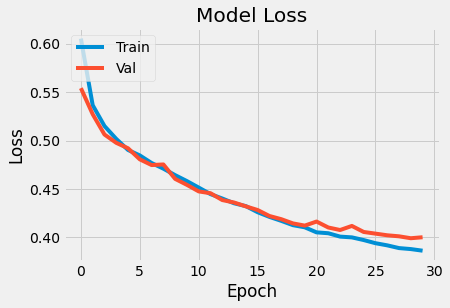

In [64]:
from matplotlib import pyplot as pyplot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

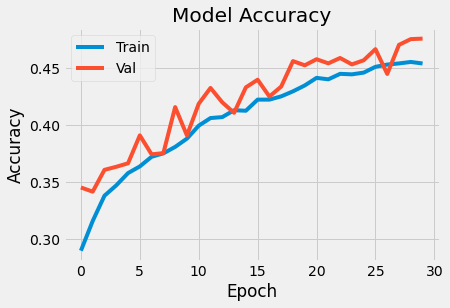

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Evaluation

Returns the loss value & metrics values for the model.

In [66]:
model.evaluate(x_test,y_test,batch_size=128)

2/2 [==============================] - 2s 694ms/step - loss: 0.4406 - accuracy: 0.4689


[0.44062340259552, 0.4688861668109894]

## Prediction

Generates output predictions for the input samples.


In [67]:
y_prediction = model.predict(x_test)
y_prediction.shape
print(pd.DataFrame(y_prediction[0]))

pred_cols = ['reactivity', 'deg_50C', 'deg_pH10', 
             'deg_Mg_50C', 'deg_Mg_pH10']

           0         1         2         3         4
0   0.781115  0.787848  2.046425  0.583513  0.654595
1   2.697897  3.004267  4.724540  3.515979  3.341533
2   1.500947  0.530698  0.487492  0.413106  0.420569
3   1.444649  1.601451  1.379849  1.840595  1.365516
4   1.017354  0.902843  0.689923  1.000053  0.753571
..       ...       ...       ...       ...       ...
63  0.201955  0.172998  0.195131  0.193149  0.305189
64  0.335672  0.577371  0.569522  0.546145  0.581932
65  0.676395  0.586666  0.382731  0.605250  0.528156
66  0.548005  0.309914  0.291300  0.456102  0.427333
67  0.478054  0.357035  0.454306  0.271941  0.376543

[68 rows x 5 columns]


In [68]:
def degradation_sample(index):
    orig_cols = ['reactivity', 'deg_50C', 'deg_pH10', 
                 'deg_Mg_50C', 'deg_Mg_pH10']
    pred_cols = ['reactivity_pred', 'deg_50C_pred', 'deg_pH10_pred', 
                 'deg_Mg_50C_pred', 'deg_Mg_pH10_pred']
    pred_df = pd.DataFrame(y_prediction[index], columns=pred_cols)
    orig_df = pd.DataFrame(y_test[index], columns=orig_cols)
    orig_pred_df = pd.concat([orig_df, pred_df], axis=1)
    return orig_pred_df

In [69]:
degradation_sample(5)

,reactivity,deg_50C,deg_pH10,deg_Mg_50C,deg_Mg_pH10,reactivity_pred,deg_50C_pred,deg_pH10_pred,deg_Mg_50C_pred,deg_Mg_pH10_pred
0,0.3414,0.6130,2.6274,0.4980,0.6670,0.566383,0.762945,2.623831,0.656734,0.818019
1,0.9922,1.6510,2.3196,1.2314,1.1585,1.417901,1.697816,2.853044,1.642506,1.617994
2,0.9778,1.1888,0.9474,1.2987,0.8501,1.330759,1.226777,1.258830,1.372335,0.960269
3,0.5998,0.6071,0.4621,0.6596,0.2778,0.919116,0.863332,0.793438,0.967919,0.698225
4,0.7414,0.6832,0.8160,0.4546,0.3211,0.754167,0.762710,0.774240,0.683594,0.671036
...,...,...,...,...,...,...,...,...,...,...
63,0.0611,0.1093,0.0321,0.0264,0.1177,0.183115,0.273281,0.209009,0.188864,0.340349
64,0.0250,0.0767,0.1006,0.0475,0.0706,0.135001,0.317583,0.181686,0.143279,0.278878
65,0.0446,0.0997,0.0818,0.0693,0.2182,0.112196,0.283800,0.252030,0.321881,0.461524
66,0.1019,0.3660,0.2405,0.2343,0.3739,0.126117,0.500375,0.569076,0.650639,0.802922


In [ ]:
#plot a lineplot